# The Tait Graph Algorithm

##### Here we present an implementation of the algorithm described in [] to compute the Tait graph from a PD-code. 

###### TODO: 1) Implement the directed edge from the silver-williams paper.
######       2) Implement handling of R1 and self loops
######       3) Implement finding the white graph when interior R1 moves are present

In [7]:
def color_and_plot_graph(g):
    red_edges = [e for e in g.edge_iterator() if e[2] == 1]
    g.plot(edge_color='blue', edge_colors={'red': red_edges}).show(figsize = 6)

In [2]:
import sage.graphs.graph as graph

def tait_graph(K):
    regions = [[abs(element) for element in sublist] for sublist in K.regions()]
    crossings = [set(pd) for pd in K.pd_code()]

    faces_static = {index: tuple(region) for index, region in enumerate(regions)}
    faces = {tuple(region): index for index, region in enumerate(regions)}
    edges = []
    seen = []

    for ind in range(len(faces)):
        common_list = [c for c in crossings if len(set(faces_static[ind]).intersection(c)) == 2]

        set_diff = [set(c).difference(faces_static[ind]) for c in common_list]

        neighboring_regions = [(key, value) for key, value in faces_static.items() for s in set_diff if len(set(value).intersection(s)) == 2]
        neighboring_regions_list = [region for region in regions for s in set_diff if len(set(region).intersection(s)) == 2]

        for i in range(len(neighboring_regions)):
            if neighboring_regions[i][1] not in seen:
                edges.append((faces[faces_static[ind]], neighboring_regions[i][0], weights(K.pd_code(), list(faces_static[ind]), neighboring_regions_list[i])))
        seen.append(faces_static[ind])
    G = graph.Graph(edges, multiedges=True, loops = True)
    components = G.connected_components()
    if len(components) > 2:
        raise ValueError('The link diagram is split.')
    return G.subgraph(components[0]), G.subgraph(components[1])

In [12]:
#find pd_code such that the union of region and neighboring region intersect with pd_code is exactly of length 4
def find_pd_code(pd_code, region, neighboring_region):
    print(f"region: {region}")
    combined = set(region).union(set(neighboring_region))
    for pd in pd_code:
        if len(combined.intersection(set(pd))) == 4:
            print(f"find_pd_code: {pd}")
            return pd

def matches_cyclic_order(corner, crossing):
    n = len(crossing)
    for i in range(n):
        if crossing[i] == corner[0] and crossing[(i + 1) % n] == corner[1]:
            return True
    return False

def weights(pd_code, region, neighboring_region):
    #the set of cyclic pairs for a region. can think of it as the corners of the crossings as one walks counter clockwise around the region
    #turning left at each crossing
    cyclic_pairs = [[region[i], region[(i + 1) % len(region)]] for i in range(len(region))]
    
    #TODO: implement differentiation between crossings in the find_pd_code between two regions that share more than one 'edge' (compatibility iwth R2 moves)

    crossing = find_pd_code(pd_code, region, neighboring_region)

    corner = [c for c in cyclic_pairs if len(set(c).intersection(set(crossing))) == 2]
    print(f"corner: {corner}")
    
    if len(corner) > 1:
        # Find the corner that matches the order in the crossing list
        corner = [corner for corner in corner if matches_cyclic_order(corner, crossing)]

    """
    check the index of the first value in the cyclic pairs list for each cyclic pair and see which strand it is in the pd_code
    the first element in a cyclic pair is the 'incoming' strand that forms the region
    if the corresponding index is 0 or 2, then it is the understrand, and thus the overstrand passes from left to right
    and the crossing is positive. if the index is 1 or 3, then it is a component of the overstrand, and the overstrand
    passes right to left and the crossing is negative
    """

    index_of_crossing = crossing.index(corner[0][0])    
    if index_of_crossing == 0 or index_of_crossing == 2:
        return 1
    else:
        return -1

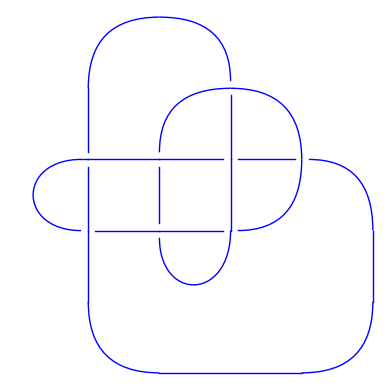

region: [16, 7, 11, 5]
find_pd_code: [10, 6, 11, 5]
corner: [[11, 5]]
region: [16, 7, 11, 5]
find_pd_code: [10, 6, 11, 5]
corner: [[11, 5]]
region: [16, 7, 11, 5]
find_pd_code: [16, 7, 1, 8]
corner: [[16, 7]]
region: [16, 7, 11, 5]
find_pd_code: [4, 15, 5, 16]
corner: [[5, 16]]
region: [15, 5, 10, 3]
find_pd_code: [9, 2, 10, 3]
corner: [[10, 3]]
region: [15, 5, 10, 3]
find_pd_code: [10, 6, 11, 5]
corner: [[5, 10]]
region: [15, 5, 10, 3]
find_pd_code: [14, 3, 15, 4]
corner: [[3, 15]]
region: [15, 5, 10, 3]
find_pd_code: [14, 3, 15, 4]
corner: [[3, 15]]
region: [14, 3, 9]
find_pd_code: [9, 2, 10, 3]
corner: [[3, 9]]
region: [14, 3, 9]
find_pd_code: [13, 9, 14, 8]
corner: [[9, 14]]
region: [14, 3, 9]
find_pd_code: [14, 3, 15, 4]
corner: [[14, 3]]
region: [13, 9, 2]
find_pd_code: [1, 12, 2, 13]
corner: [[2, 13]]
region: [13, 9, 2]
find_pd_code: [13, 9, 14, 8]
corner: [[13, 9]]
region: [12, 2, 10, 6]
find_pd_code: [1, 12, 2, 13]
corner: [[12, 2]]
region: [11, 6]
find_pd_code: [6, 12, 7, 11]

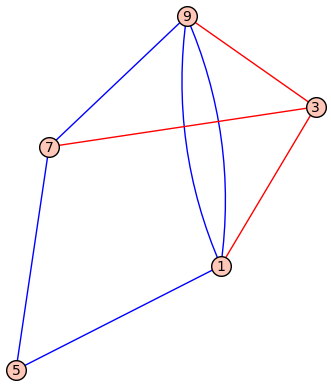

In [15]:
import snappy
K = Knot([[16, 7, 1, 8], [1, 12, 2, 13], [9, 2, 10, 3], [14, 3, 15, 4], [4, 15, 5, 16], [10, 6, 11, 5], [6, 12, 7, 11], [13, 9, 14, 8]])
K.plot().show()
black, white = tait_graph(K)
color_and_plot_graph(white)

## CSV Shit

In [41]:
#adding edge graphs to csv
from sage.all_cmdline import *   # import sage library
from sage.knots.link import *
from sage import *

_sage_const_0 = Integer(0); _sage_const_1 = Integer(1)
import ast
import sage.all as sage
import pandas as pd

# Read the CSV file
df = pd.read_csv("/home/cawilson1/REU2024/REU2024-2/knot_info_PD&Det_13_Crossings.csv", sep=';')

def abs_regions(self):
    regions = self.regions()
    return [set(abs(element) for element in reg) for reg in regions]

def abs_list_of_lists(lists):
    return [[abs(element) for element in sublist] for sublist in lists]

def knot_type(pd_code):
    Z2_list = [[p % 2 for p in c] for c in pd_code]
    typeI = [[0, 0, 1, 1], [1, 1, 0, 0]]
    typeII = [[0,1,1,0],[1,0,0,1]]
    if all(c in typeI for c in Z2_list) == True:
        return 'TypeI', Z2_list
    else:
        zero_count = sum(1 for t in Z2_list if t == typeII[0])
        one_count = sum(1 for t in Z2_list if t == typeII[1])
        return 'TypeII', Z2_list

#returns the pd_code as a set. Used supplementarily to aid in intersection and difference checks.
def cross(self):
    return [set(pd) for pd in self.pd_code()]

#quick graph
def decorate_and_plot_graph(g):
    if g.has_multiple_edges() == False:
        plot = g.plot(layout = 'planar', dist = 0.15, iterations = 200, edge_labels=True)
    else:
        plot = g.plot(layout = 'spring', dist = 0.15, iterations = 200, edge_labels=True)
    plot.show(figsize = 6)

#quick graph where red represents positive crossings
def color_and_plot_graph(g):
    red_edges = [e for e in g.edge_iterator() if e[2] == 1]
    g.plot(edge_color='blue', edge_colors={'red': red_edges}).show(figsize = 6)

def clean_pd_code(pd_code_str):
    """
    Clean the pd_code string by replacing semicolons with commas.
    """
    return pd_code_str.replace(';', ',')

def tait_graph(pd):
    # Ensure pd is a proper list
    if isinstance(pd, str):
        import ast
        try:
            pd = ast.literal_eval(pd)
        except Exception as e:
            raise ValueError(f"Error converting pd_code from string: {e}")

    if not isinstance(pd, list):
        raise ValueError("pd_code must be a list.")
    
    for sublist in pd:
        if not isinstance(sublist, list):
            raise ValueError("Each element of pd_code must be a list.")
        for item in sublist:
            if not isinstance(item, int):
                raise ValueError("Each item in pd_code must be an integer.")
    
    try:
        K = Knot(pd)
    except Exception as e:
        print(f"Error initializing Knot: {e}")
        return []
    
    K = Knot(list(pd))
    regions_as_list = abs_list_of_lists(K.regions())

    #regions = [set(abs(element) for element in reg) for reg in self.regions()]

    regions = abs_regions(K)
    crossings = cross(K)
    pd_code = K.pd_code()
    faces_static = {index: tuple(region) for index, region in enumerate(regions)}
    faces_static_list = {index: region for index, region in enumerate(regions_as_list)}
    faces = {tuple(region): index for index, region in enumerate(regions)}
    edges = []
    seen = []

    # TODO: implement the directed edge from the silver-williams paper.

    for ind in range(len(faces)):
        common_list = [c for c in crossings if len(set(faces_static[ind]).intersection(c)) == 2]

        set_diff = [set(c).difference(faces_static[ind]) for c in common_list]

        neighboring_regions = [(key, value) for key, value in faces_static.items() for s in set_diff if len(set(value).intersection(s)) == 2]
 
        neighboring_regions_list = [region for region in regions_as_list for s in set_diff if len(set(region).intersection(s)) == 2]

        #TODO implement handling of R1 and self loops
        #TODO implement finding the white graph when interior R1 moves are present

        for i in range(len(neighboring_regions)):
            if neighboring_regions[i][1] not in seen:
                #print(f"Drawing edge from {(faces[faces_static[ind]])} (region {[faces_static[ind]]}) to {neighboring_regions[i][0]} (region {neighboring_regions[i][1]}) with weight {weight_list[i]}")
                edges.append((faces[faces_static[ind]], neighboring_regions[i][0], weights(pd_code, faces_static_list[ind], neighboring_regions_list[i])))
        seen.append(faces_static[ind])
    #G = graph.Graph(edges, multiedges=True, loops = True)
    #components = G.connected_components()
    #if len(components) > 2:
    #    raise ValueError('The link diagram is split.')
    #white = G.subgraph(components[1])
    return edges

# Initialize counter
counter = _sage_const_0 

df['edge_graph'] = None

# Apply the function to the 'incr_pd_notation' column and store the results in 'edge_graph'
nan_values = ~df['PD Notation'].isna()  # Identify NaN values in 'incr_pd_notation' column
for idx, val in df.loc[nan_values, 'PD Notation'].items():
    cleaned_val = clean_pd_code(val)
    df.at[idx, 'edge_graph'] = tait_graph(cleaned_val)
    counter += _sage_const_1 
    print(f"Processed {counter} knots")

# Output debug information
print("Processing completed.")
#df.loc[nan_values, 'Type'] = df[nan_values].incr_pd_notation.apply( lambda x : knot_type(x))

# Save the DataFrame to CSV
df.to_csv("/home/cawilson1/REU2024/REU2024-2/knot_info_PD&Det_13_Crossings_edge_graph.csv", sep=';', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/home/cawilson1/REU2024/REU2024-2/knot_info_PD&Det_13_Crossings.csv'

In [ ]:
#plotting graphs to

import pandas as pd
from sage.graphs.graph import Graph
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import ast

def decorate_and_plot_graph(edges, name):
    g = Graph(edges, multiedges = True)
    # SageMath plots can be saved to a file instead of a Matplotlib figure
    plot_file = f"/tmp/{name}.png"
    red_edges = [e for e in g.edge_iterator() if e[2] == 1]
    g.plot(edge_color='blue', edge_colors={'red': red_edges}, title=str(name)).save(plot_file)
    return plot_file

def save_all_graphs_to_pdf(csv_file, output_pdf):
    # Read the CSV file
    df = pd.read_csv(csv_file, delimiter=';')
    
    # Create a PdfPages object to save all plots in a single PDF
    with PdfPages(output_pdf) as pdf:
        # Iterate through the rows of the DataFrame
        for index, row in df.iterrows():
            name = row['Name']
            print(name)
            edges = ast.literal_eval(row['edge_graph'])  # Convert string representation of list to list
            
            # Generate and save the plot
            plot_file = decorate_and_plot_graph(edges, name)
            
            # Read the saved plot into Matplotlib and save to PDF
            img = plt.imread(plot_file)
            fig, ax = plt.subplots(figsize=(8, 6))
            ax.imshow(img)
            ax.axis('off')  # Hide axes
            pdf.savefig(fig)  # Save the current figure into the PDF
            plt.close(fig)  # Close the figure to free up memory

# Usage
csv_file = '/home/cawilson1/REU2024/REU2024-2/knot_info_PD&Det_13_Crossings_edge_graph.csv'  # Path to your CSV file
output_pdf = '/home/cawilson1/REU2024/REU2024-2/all_tait_graphs_13_crossings.pdf'  # Path to the output PDF file
save_all_graphs_to_pdf(csv_file, output_pdf)

In [1]:
import pandas as pd
from sage.graphs.graph import Graph
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import ast

def decorate_and_plot_graph(edges, name, pdf):
    g = Graph(edges, multiedges=True)
    red_edges = [e for e in g.edge_iterator() if e[2] == 1]
    plot = g.plot(edge_color='blue', edge_colors={'red': red_edges}, title=str(name))

    fig = plot.matplotlib()
    pdf.savefig(fig)
    plt.close(fig)

def save_all_graphs_to_pdf(csv_file, output_pdf):
    # Read the CSV file
    df = pd.read_csv(csv_file, delimiter=';')
    
    # Create a PdfPages object to save all plots in a single PDF
    with PdfPages(output_pdf) as pdf:
        # Iterate through the rows of the DataFrame
        for index, row in df.iterrows():
            name = row['Name']
            print(f"Processing {name} ({index + 1}/{len(df)})")
            edges = ast.literal_eval(row['edge_graph'])  # Convert string representation of list to list
            
            # Generate and save the plot directly to the PDF
            decorate_and_plot_graph(edges, name, pdf)

# Usage
csv_file = '/home/cawilson1/REU2024/REU2024-2/knot_info_PD&Det_13_Crossings_edge_graph.csv'  # Path to your CSV file
output_pdf = '/home/cawilson1/REU2024/REU2024-2/all_tait_graphs_13_crossings.pdf'  # Path to the output PDF file
save_all_graphs_to_pdf(csv_file, output_pdf)

print("Processing completed.")

Processing 3_1 (1/2977)
Processing 4_1 (2/2977)
Processing 5_1 (3/2977)
Processing 5_2 (4/2977)
Processing 6_1 (5/2977)
Processing 6_2 (6/2977)
Processing 6_3 (7/2977)
Processing 7_1 (8/2977)
Processing 7_2 (9/2977)
Processing 7_3 (10/2977)
Processing 7_4 (11/2977)
Processing 7_5 (12/2977)
Processing 7_6 (13/2977)
Processing 7_7 (14/2977)
Processing 8_1 (15/2977)
Processing 8_2 (16/2977)
Processing 8_3 (17/2977)
Processing 8_4 (18/2977)
Processing 8_5 (19/2977)
Processing 8_6 (20/2977)
Processing 8_7 (21/2977)
Processing 8_8 (22/2977)
Processing 8_9 (23/2977)
Processing 8_10 (24/2977)
Processing 8_11 (25/2977)
Processing 8_12 (26/2977)
Processing 8_13 (27/2977)
Processing 8_14 (28/2977)
Processing 8_15 (29/2977)
Processing 8_16 (30/2977)
Processing 8_17 (31/2977)
Processing 8_18 (32/2977)
Processing 8_19 (33/2977)
Processing 8_20 (34/2977)
Processing 8_21 (35/2977)
Processing 9_1 (36/2977)
Processing 9_2 (37/2977)
Processing 9_3 (38/2977)
Processing 9_4 (39/2977)
Processing 9_5 (40/297

In [2]:
import pandas as pd
from sage.graphs.graph import Graph
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import ast

def decorate_and_plot_graph(edges, name, pdf):
    g = Graph(edges, multiedges=True)
    red_edges = [e for e in g.edge_iterator() if e[2] == 1]
    plot = g.plot(edge_color='blue', edge_colors={'red': red_edges})
    
    # Get the Matplotlib figure from SageMath's plot
    fig = plot.matplotlib()
    
    # Add the title (knot name) to the plot
    ax = fig.gca()
    ax.set_title(name)
    
    # Save the plot to the PDF
    pdf.savefig(fig)
    
    # Close the figure to free up memory
    plt.close(fig)

def save_all_graphs_to_pdf(csv_file, output_pdf):
    # Read the CSV file
    df = pd.read_csv(csv_file, delimiter=';')
    
    # Create a PdfPages object to save all plots in a single PDF
    with PdfPages(output_pdf) as pdf:
        # Iterate through the rows of the DataFrame
        for index, row in df.iterrows():
            name = row['Name']
            print(f"Processing {name} ({index + 1}/{len(df)})")
            edges = ast.literal_eval(row['edge_graph'])  # Convert string representation of list to list
            
            # Generate and save the plot directly to the PDF
            decorate_and_plot_graph(edges, name, pdf)

# Usage
csv_file = '/home/cawilson1/REU2024/REU2024-2/knot_info_PD&Det_13_Crossings_edge_graph.csv'  # Path to your CSV file
output_pdf = '/home/cawilson1/REU2024/REU2024-2/all_tait_graphs_13_crossings_named.pdf'  # Path to the output PDF file
save_all_graphs_to_pdf(csv_file, output_pdf)

print("Processing completed.")

Processing 3_1 (1/2977)
Processing 4_1 (2/2977)
Processing 5_1 (3/2977)
Processing 5_2 (4/2977)
Processing 6_1 (5/2977)
Processing 6_2 (6/2977)
Processing 6_3 (7/2977)
Processing 7_1 (8/2977)
Processing 7_2 (9/2977)
Processing 7_3 (10/2977)
Processing 7_4 (11/2977)
Processing 7_5 (12/2977)
Processing 7_6 (13/2977)
Processing 7_7 (14/2977)
Processing 8_1 (15/2977)
Processing 8_2 (16/2977)
Processing 8_3 (17/2977)
Processing 8_4 (18/2977)
Processing 8_5 (19/2977)
Processing 8_6 (20/2977)
Processing 8_7 (21/2977)
Processing 8_8 (22/2977)
Processing 8_9 (23/2977)
Processing 8_10 (24/2977)
Processing 8_11 (25/2977)
Processing 8_12 (26/2977)
Processing 8_13 (27/2977)
Processing 8_14 (28/2977)
Processing 8_15 (29/2977)
Processing 8_16 (30/2977)
Processing 8_17 (31/2977)
Processing 8_18 (32/2977)
Processing 8_19 (33/2977)
Processing 8_20 (34/2977)
Processing 8_21 (35/2977)
Processing 9_1 (36/2977)
Processing 9_2 (37/2977)
Processing 9_3 (38/2977)
Processing 9_4 (39/2977)
Processing 9_5 (40/297

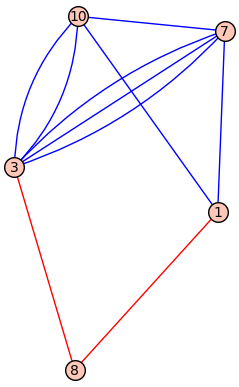

{10: 0, 1: 1, 3: 2, 7: 3, 8: 4}


-35

In [69]:
from from_table import *
K = Knot(from_table[(10,162)])
black, white = tait_graph(K)
color_and_plot_graph(white)
L = weighted_laplacian(white)
R = reduced_weighted_laplacian(L, 0)
R.det()

In [5]:
def weighted_laplacian(G):
    edge_list = G.edges()
    vertices = G.get_vertices()
    vert_list = G.vertices()
    vert_dictionary = {value: key for key, value in enumerate(vertices)}
    print(vert_dictionary)
    n = G.order()
    M = Matrix(QQ, n, n)
    for e in edge_list:
        M[vert_dictionary[e[0]],vert_dictionary[e[1]]] += e[2]
        M[vert_dictionary[e[1]],vert_dictionary[e[0]]] += e[2]
        M[vert_dictionary[e[0]],vert_dictionary[e[0]]] -= e[2]
        M[vert_dictionary[e[1]],vert_dictionary[e[1]]] -= e[2]
    return M

def reduced_weighted_laplacian(M, i):
    return M.delete_rows([i]).delete_columns([i])

{0: 0, 2: 1, 5: 2, 8: 3, 9: 4}
21


In [86]:
#adding edge graphs to csv

from sage.all_cmdline import *   # import sage library
from sage.knots.link import *
from sage import *
import sage.graphs.graph as graph

_sage_const_0 = Integer(0); _sage_const_1 = Integer(1)
import ast
import sage.all as sage
import pandas as pd

# Read the CSV file
df = pd.read_csv("/home/cawilson1/REU2024/REU2024-2/knot_info_PD&Det_13_Crossings.csv", sep=';')

print("Read the csv")

def weighted_laplacian_det(edges):
    #print(edges)
    edges = ast.literal_eval(edges)
    G = graph.Graph(edges, multiedges=True, loops = True)
    edge_list = G.edges()
    vertices = G.get_vertices()
    vert_dictionary = {value: key for key, value in enumerate(vertices)}
    #print(vert_dictionary)
    n = G.order()
    print(n)
    M = Matrix(QQ, n, n)
    for e in edge_list:
        M[vert_dictionary[e[0]],vert_dictionary[e[1]]] += e[2]
        M[vert_dictionary[e[1]],vert_dictionary[e[0]]] += e[2]
        M[vert_dictionary[e[0]],vert_dictionary[e[0]]] -= e[2]
        M[vert_dictionary[e[1]],vert_dictionary[e[1]]] -= e[2]
    reduced_weighted_laplacian = M.delete_rows([0]).delete_columns([0])
    return abs(reduced_weighted_laplacian.det())


# Initialize counter
counter = _sage_const_0 

#df['white_edge_graph'] = None
df['det_white_graph'] = None

# Apply the function to the 'incr_pd_notation' column and store the results in 'edge_graph'
nan_values = ~df['white_edge_graph'].isna()  # Identify NaN values in 'incr_pd_notation' column
for idx, val in df.loc[nan_values, 'white_edge_graph'].items():
    #print(f"Aboute to process {counter} knot")
    df.at[idx, 'det_white_graph'] = weighted_laplacian_det(val)
    counter += _sage_const_1 
    #print(f"Processed {counter} knots")

# Output debug information
print("Processing completed.")

#df.loc[nan_values, 'Type'] = df[nan_values].incr_pd_notation.apply( lambda x : knot_type(x))

# Save the DataFrame to CSV
df.to_csv("/home/cawilson1/REU2024/REU2024-2/gay_woman_knot_info_PD&Det_13_Crossings.csv", sep=';', index=False)

Read the csv
2
3
2
3
3
3
4
2
3
4
3
4
4
4
3
3
5
3
3
5
4
4
5
4
5
5
4
5
5
4
5
5
4
5
5
2
3
4
5
3
4
5
4
4
5
4
5
5
4
5
4
4
5
5
4
5
4
5
5
5
5
5
5
4
5
5
5
5
5
3
4
5
5
5
5
4
4
5
5
5
5
5
5
4
3
3
5
3
4
5
5
3
5
4
5
6
5
5
4
5
6
5
4
5
5
5
6
5
5
5
6
4
5
5
6
5
6
4
5
5
6
5
5
6
5
6
6
5
6
3
4
6
5
5
6
4
5
4
5
5
6
5
5
5
3
4
5
5
6
5
5
4
6
5
6
5
6
5
5
5
6
5
6
5
6
5
6
6
4
5
5
6
6
5
6
5
4
5
6
5
5
5
6
4
5
5
6
6
5
5
6
4
6
5
5
5
6
5
6
5
6
6
5
5
6
5
6
4
5
5
5
6
5
5
5
5
6
6
6
5
5
5
4
6
5
6
5
6
5
5
6
5
5
6
6
6
5
6
5
6
6
5
5
6
6
5
5
5
5
6
6
6
5
6
6
6
5
4
6
6
6
5
6
5
6
6
6
6
6
5
5
6
6
6
6
6
6
5
6
6
6
5
6
6
6
5
6
5
5
6
6
6
6
6
5
6
6
6
5
6
6
5
6
5
6
5
6
4
6
5
4
6
6
5
6
5
5
6
6
6
6
6
4
6
6
6
6
6
6
5
5
5
6
6
5
6
6
6
5
6
6
5
6
5
6
4
6
5
6
6
6
5
6
6
6
5
5
6
6
5
6
5
6
5
6
6
6
5
6
6
6
5
6
6
6
5
6
5
6
6
6
5
6
6
6
5
6
6
4
5
4
6
6
5
6
6
5
6
6
6
5
5
6
6
6
6
5
6
6
4
6
5
6
5
6
6
6
5
6
6
6
6
5
6
6
5
6
4
6
6
5
6
6
5
6
6
4
6
5
6
5
6
5
4
6
6
5
5
5
6
6
4
6
5
4
6
6
6
6
5
6
6
5
5
6
6
6
5
6
6
5
4
6
4
6
6
6
5
5
5
5
6
4
6
6
5
5
6
4
6
6
5
6
6

### Chase's Type I/II Stuff

In [4]:
def abs_regions(self):
    regions = self.regions()
    return [set(abs(element) for element in reg) for reg in regions]

def weight(tuple, kt):
    if kt == 'TypeI':
        if int(tuple[2]) % 2 == 1:
            return +1
        else:
            return -1
    else:
        if int(tuple[2]) % 2 == 1:
            return -1
        else:
            return +1

#returns the length of the intersection of two sets. used primarily for the weights of the crossings, as a set is unordered.
def common_elements(lst, s):
    list_set = set(lst)
    common = list_set.intersection(s)
    return len(common)